### Decision tree

A decision tree is a non-parametric supervised learning algorithm, which is utilized for both classification and regression
tasks. It has a hierarchical, tree structure, which consists of a root node, branches, internal nodes and leaf nodes.

### types of Decision tree

1. ID3
2. c4.5
3. cart

### how to choose best attributes at each node

1. information gain or entropy
2. gini impurity

### Decision tree clssifier key parameter

1. max_depth
2. min_samples_leaf
3. max_leaf_nodes

### pros and cons of Decision tree

pros

1. easily visualized and interpret
2. no feature normalization or scaling typical needed
3. work well with datasets using a mixture of featurte(continuous,category,binary)

cons

1. even after tuning decision tree can  often still ovefitting
2. usually need a ensamble of tree of better genaralization performance

### Decision tree classifier key parameter:

1. max_depth: control maximum depth(no of split point) most common way to reduce model complexcity and overfitting
2. min_sample_leaf: threshold for the minimum # of the data instances a leaf can have to avoid further splitting
3. max_leaf_nodes: limit total no of leaves in tree
    
in practical only of of these is enough for model_complexcity and overfitting

In [2]:
#pip install graphviz

### decision tree

In [27]:
from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_breast_cancer
from adspy_shared_utilities import load_crime_dataset

cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])
# Breast cancer dataset for classification
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)


In [19]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from adspy_shared_utilities import plot_decision_tree
from sklearn.model_selection import train_test_split

iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)
clf = DecisionTreeClassifier().fit(X_train, y_train)

print("decision tree classifier")
print("accurcy of decisrion tree training set: {:.2f}".format(clf.score(X_train,y_train)))
print("accurcy of decisrion tree test  set: {:.2f}".format(clf.score(X_test,y_test)))

decision tree classifier
accurcy of decisrion tree training set: 1.00
accurcy of decisrion tree test  set: 0.97


#### setting max decision tree depth to help overfitting 

In [20]:
clf2 = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)#setting max depth is calklingb pre pruning

print("decision tree classifier2")
print("accurcy of decisrion tree training set: {:.2f}".format(clf2.score(X_train,y_train)))
print("accurcy of decisrion tree test  set: {:.2f}".format(clf2.score(X_test,y_test)))

decision tree classifier2
accurcy of decisrion tree training set: 0.98
accurcy of decisrion tree test  set: 0.97


#### visualizing decision tree

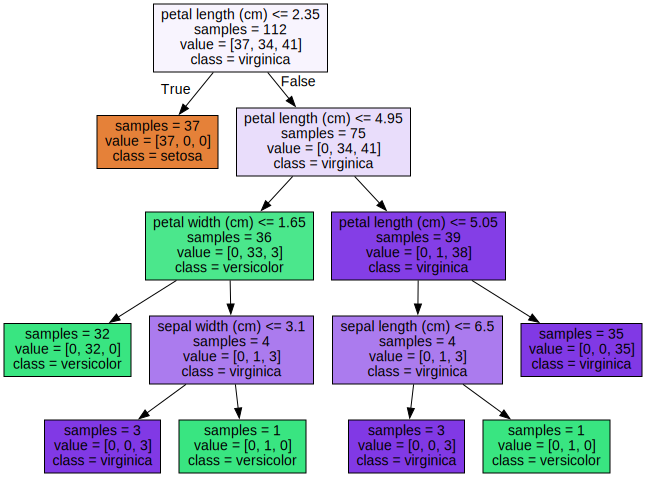

In [21]:
plot_decision_tree(clf,iris.feature_names,iris.target_names)

#### pre pruned version max depth 3

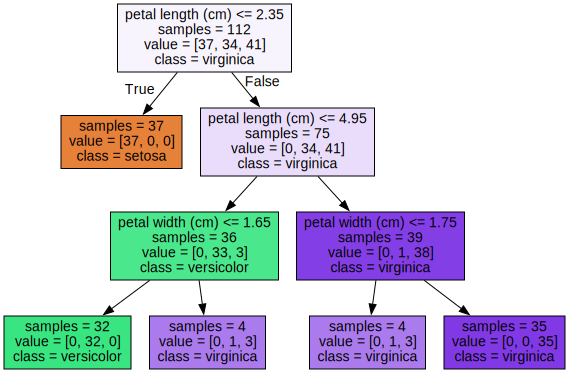

In [23]:
plot_decision_tree(clf2,iris.feature_names,iris.target_names)

### feature importances

<IPython.core.display.Javascript object>


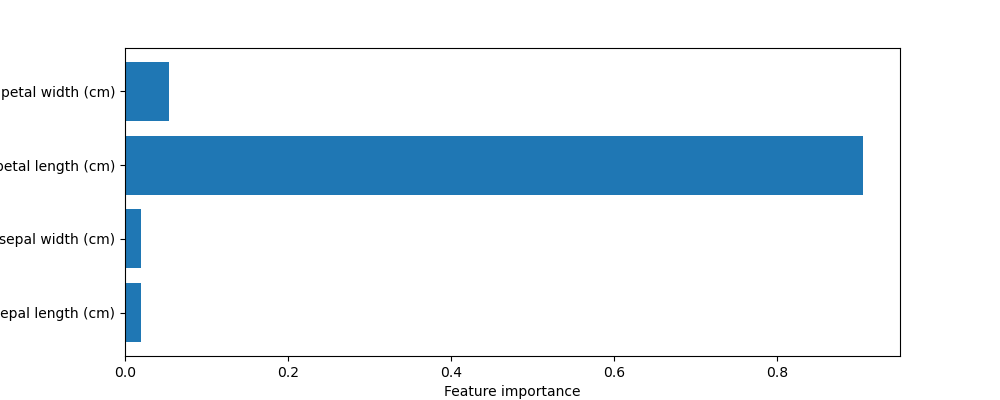

feature_importances:[0.02014872 0.02014872 0.90597266 0.05372991]


In [25]:
from adspy_shared_utilities import plot_feature_importances
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plot_feature_importances(clf,iris.feature_names)
plt.show()
print("feature_importances:{}".format(clf.feature_importances_));
#print('Feature importances: {}'.format(clf.feature_importances_))

<IPython.core.display.Javascript object>


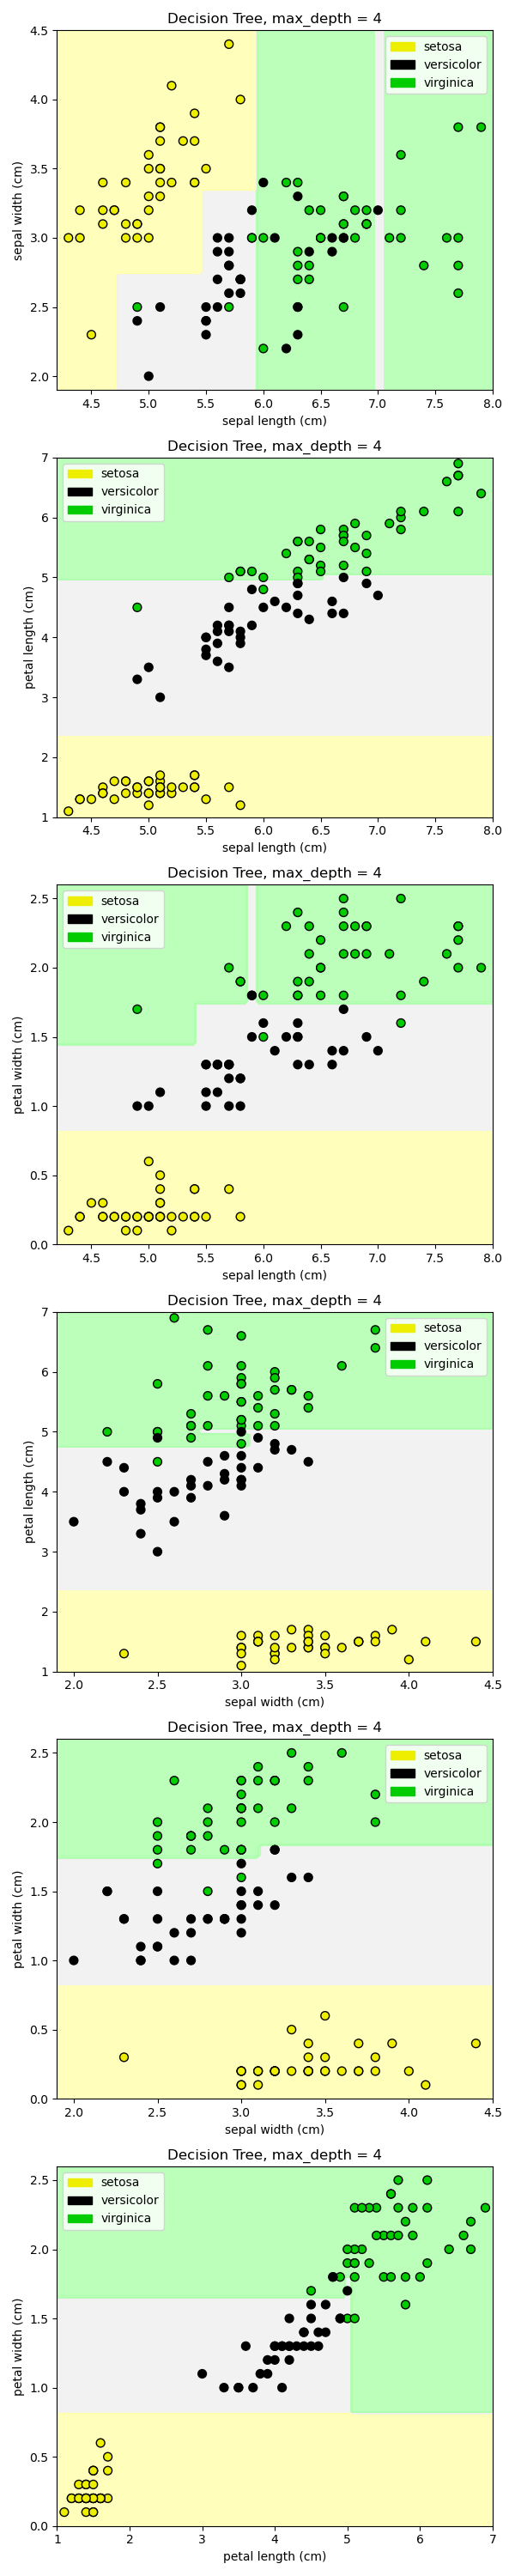

In [26]:
from sklearn.tree import DecisionTreeClassifier
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

fig, subaxes = plt.subplots(6,1,figsize=(6,30))
pair_list = [[0,1], [0,2], [0,3], [1,2], [1,3], [2,3]]
#pair_list = [[0,1], [0,2], [0,3], [1,2], [1,3], [2,3]]
tree_max_depth = 4

for pair, axis in zip(pair_list,subaxes):
    X = X_train[:, pair]
    y = y_train
    
    clf = DecisionTreeClassifier(max_depth=tree_max_depth).fit(X,y)
    title = 'Decision Tree, max_depth = {:d}'.format(tree_max_depth)
    plot_class_regions_for_classifier_subplot(clf,X,y,None,None,title,axis,iris.target_names)
    axis.set_xlabel(iris.feature_names[pair[0]])
    axis.set_ylabel(iris.feature_names[pair[1]])
    
plt.tight_layout()
plt.show()

In [6]:
#conda install -c conda-forge python-graphviz

In [8]:
#conda update -n base -c defaults conda

In [9]:
 #pip install graphviz-2.38

### decison tree on a real world datasets

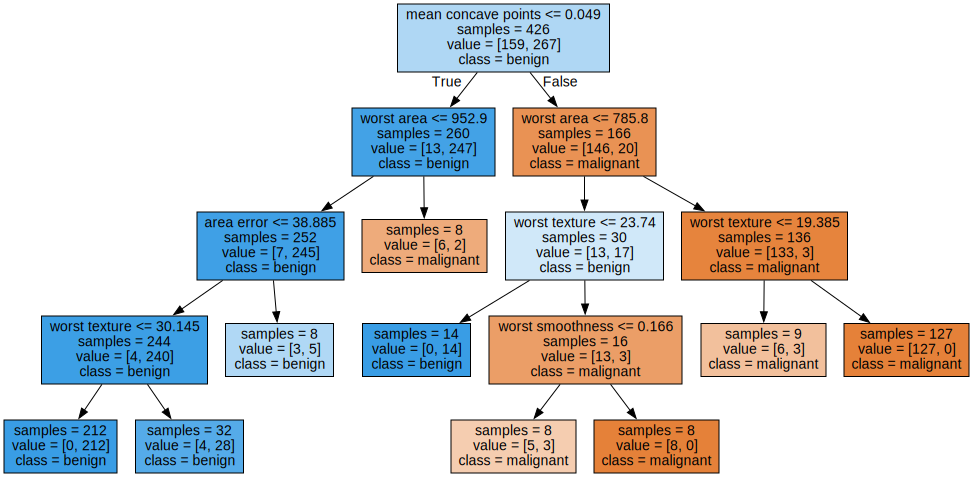

In [28]:
from sklearn.tree import DecisionTreeClassifier
from adspy_shared_utilities import plot_decision_tree
from adspy_shared_utilities import plot_feature_importances

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

clf = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 8,
                            random_state = 0).fit(X_train, y_train)

plot_decision_tree(clf, cancer.feature_names, cancer.target_names)

Breast cancer dataset: decision tree
Accuracy of DT classifier on training set: 0.96
Accuracy of DT classifier on test set: 0.94


<IPython.core.display.Javascript object>


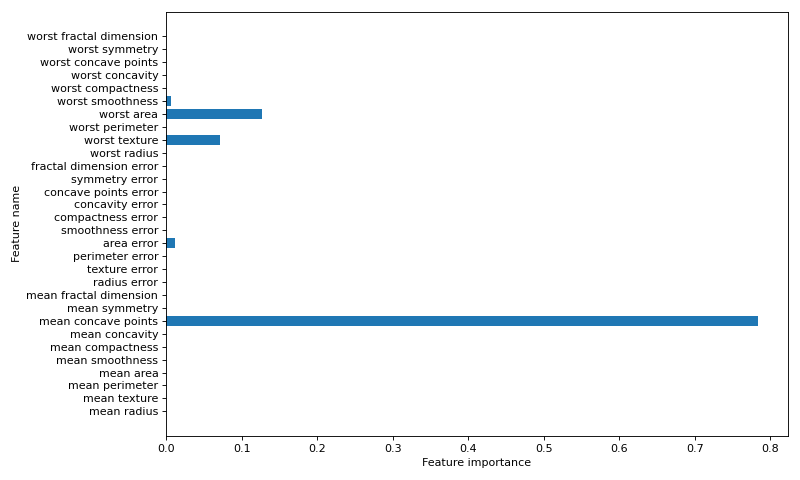

In [29]:
print('Breast cancer dataset: decision tree')
print('Accuracy of DT classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of DT classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

plt.figure(figsize=(10,6),dpi=80)
plot_feature_importances(clf, cancer.feature_names)
plt.tight_layout()

plt.show()